In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score

## Load data

In [2]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
# y_test = np.load("y_test.npy")

In [3]:
# 7000 data with 300 features
print(x_train.shape)

(7000, 300)


In [4]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


## Question 1
K-fold data partition: Implement the K-fold cross-validation function. Your function should take K as an argument and return a list of lists (len(list) should equal to K), which contains K elements. Each element is a list contains two parts, the first part contains the index of all training folds, e.g. Fold 2 to Fold 5 in split 1. The second part contains the index of validation fold, e.g. Fold 1 in  split 1

In [5]:
def cross_validation(x_train, y_train, k=5):
    index_shuffle = np.arange(x_train.shape[0])
    np.random.shuffle(index_shuffle)

    num_add_one = x_train.shape[0] % k
    fold_size = x_train.shape[0] // k
    print("fold_size = ", fold_size)
    kfold_data = []
    for i in range(k):
        if i < num_add_one:
            begin = i * (fold_size + 1)
            end = (i+1) * (fold_size + 1)
        else:
            begin = i * fold_size + num_add_one
            end = (i+1) * fold_size + num_add_one

        kfold_train = np.concatenate([index_shuffle[: begin], index_shuffle[end :]])
        kfold_val = index_shuffle[begin: end]
        kfold_data.append([kfold_train, kfold_val])
    return kfold_data

In [6]:
kfold_data = cross_validation(x_train, y_train, k=10)
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 700 # The number of data in each validation fold should equal to training data divieded by K

fold_size =  700


## example

In [7]:
from sklearn.model_selection import KFold

X = np.arange(20)
kf = KFold(n_splits=5, shuffle=True)
kfold_data= []
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 0  1  2  3  4  5  6  7  9 12 13 15 16 17 18 19], Validation index: [ 8 10 11 14]
Split: 2, Training index: [ 0  1  2  3  5  6  7  8 10 11 12 13 14 15 16 18], Validation index: [ 4  9 17 19]
Split: 3, Training index: [ 2  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19], Validation index: [0 1 3 6]
Split: 4, Training index: [ 0  1  2  3  4  6  8  9 10 11 12 13 14 15 17 19], Validation index: [ 5  7 16 18]
Split: 5, Training index: [ 0  1  3  4  5  6  7  8  9 10 11 14 16 17 18 19], Validation index: [ 2 12 13 15]


In [8]:
assert len(kfold_data) == 5 # should contain 5 fold of data
assert len(kfold_data[0]) == 2 # each element should contains index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divieded by K

## Question 2
Using sklearn.svm.SVC to train a classifier on the provided train set and conduct the grid search of “C” and “gamma” to find the best parameters by cross-validation.

In [9]:
kfold_data = cross_validation(x_train, y_train, k=5)
assert len(kfold_data) == 5
assert len(kfold_data[0]) == 2
assert kfold_data[0][1].shape[0] == 1400

fold_size =  1400


In [10]:
C = np.logspace(-2, 4, 7,endpoint=True, base=10)
print(C)
gammas = np.logspace(-8, -2, 7, base=10)
print(gammas)

[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
[1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02]


In [11]:
best_parameters = [None, None]
best_accuracy = -1
total_accuracy = []
for c in C:
    gamma_accuracy = []
    for gamma in gammas:
        avg_accuracy = 0
        for index_train, index_valid in kfold_data:
            x_sample = x_train[index_train]
            y_sample = y_train[index_train]
            x_val_sample = x_train[index_valid]
            y_val_sample = y_train[index_valid]
            clf = SVC(C=c, kernel='rbf', gamma=gamma)
            clf.fit(x_sample, y_sample)
            y_pred = clf.predict(x_val_sample)
            accuracy = accuracy_score(y_pred, y_val_sample)
            avg_accuracy += accuracy
        avg_accuracy /= len(kfold_data)
        if avg_accuracy > best_accuracy:
            best_parameters = [c, gamma]
            best_accuracy = avg_accuracy
        print(f"C = {c}, gamma = {gamma}: accuracy = {avg_accuracy}")
        gamma_accuracy.append(avg_accuracy)
    total_accuracy.append(gamma_accuracy)

C = 0.01, gamma = 1e-08: accuracy = 0.4885714285714286
C = 0.01, gamma = 1e-07: accuracy = 0.4885714285714286
C = 0.01, gamma = 1e-06: accuracy = 0.4885714285714286
C = 0.01, gamma = 1e-05: accuracy = 0.4885714285714286
C = 0.01, gamma = 0.0001: accuracy = 0.4885714285714286
C = 0.01, gamma = 0.001: accuracy = 0.4885714285714286
C = 0.01, gamma = 0.01: accuracy = 0.4885714285714286
C = 0.1, gamma = 1e-08: accuracy = 0.4885714285714286
C = 0.1, gamma = 1e-07: accuracy = 0.4885714285714286
C = 0.1, gamma = 1e-06: accuracy = 0.4885714285714286
C = 0.1, gamma = 1e-05: accuracy = 0.915
C = 0.1, gamma = 0.0001: accuracy = 0.9729999999999999
C = 0.1, gamma = 0.001: accuracy = 0.4885714285714286
C = 0.1, gamma = 0.01: accuracy = 0.4885714285714286
C = 1.0, gamma = 1e-08: accuracy = 0.4885714285714286
C = 1.0, gamma = 1e-07: accuracy = 0.4885714285714286
C = 1.0, gamma = 1e-06: accuracy = 0.9085714285714286
C = 1.0, gamma = 1e-05: accuracy = 0.953
C = 1.0, gamma = 0.0001: accuracy = 0.993285714

In [12]:
print(best_accuracy)

0.9932857142857143


In [17]:
print(f"best_parameters C = {best_parameters[0]}, gamma = {best_parameters[1]}")


best_parameters C = 1.0, gamma = 0.0001


## Question 3
Plot the grid search results of your SVM. The x, y represents the hyperparameters of “gamma” and “C”, respectively. And the color represents the average score of validation folds
You reults should be look like this reference image below ![image](https://miro.medium.com/max/1296/1*wGWTup9r4cVytB5MOnsjdQ.png) 

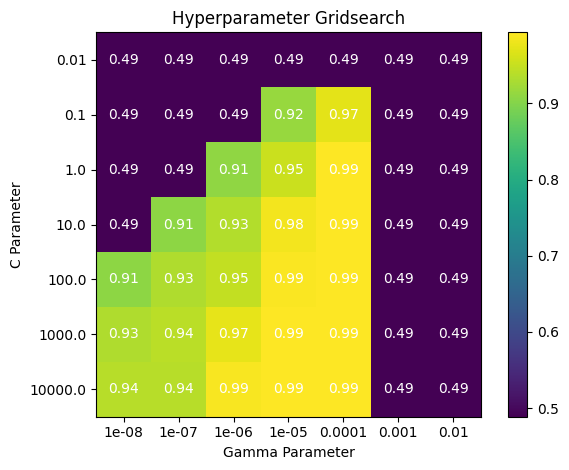

In [14]:
from matplotlib import pyplot as plt
total_accuracy = np.array(total_accuracy)

fig, ax = plt.subplots()
im = ax.imshow(total_accuracy)
ax.set_xticks(np.arange(len(gammas)), labels=gammas)
ax.set_yticks(np.arange(len(C)), labels=C)
ax.set_xlabel("Gamma Parameter")
ax.set_ylabel("C Parameter",rotation=90)
cbar = ax.figure.colorbar(im, ax=ax) #, **cbar_kw)
for i in range(len(C)):
    for j in range(len(gammas)):
        text = ax.text(j, i, round(total_accuracy[i, j], 2), ha="center", va="center", color="w")
ax.set_title("Hyperparameter Gridsearch")
fig.tight_layout()
plt.show()

## Question 4
Train your SVM model by the best parameters you found from question 2 on the whole training set and evaluate the performance on the test set.

In [22]:
best_model = SVC(C=best_parameters[0], kernel='rbf', gamma=best_parameters[1])
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)


In [23]:
print("Accuracy score: ", accuracy_score(y_pred, y_test))

NameError: name 'y_test' is not defined